**Table of contents**<a id='toc0_'></a>    
- [I. MRE (Minimum Reproducible Example) Data](#toc1_)    
    - [Places 1 Parcel Data](#toc1_1_1_)    
    - [Places 2 Parcel Data](#toc1_1_2_)    
    - [Place 3 Parcel Data](#toc1_1_3_)    
- [II. Clustering](#toc2_)    
    - [Clustering Functions](#toc2_1_1_)    
    - [Workflow](#toc2_1_2_)    
- [III. First Super Parcel Creation](#toc3_)    
- [IV. Merging](#toc4_)    
    - [Single Parcel Merging](#toc4_1_1_)    
    - [Same Owner Cluster Merging](#toc4_1_2_)    
- [V. Final Super Parcel Creation](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [677]:
from geometry import * # custom module used for MRE data creation and visualization
from shapely.ops import nearest_points
from sklearn.neighbors import NearestNeighbors
from scipy.ndimage import uniform_filter1d
import numpy as np
from math import ceil
from sklearn.cluster import DBSCAN, KMeans
from shapely.geometry import MultiPolygon, MultiPoint
from scipy.spatial import cKDTree
import warnings
warnings.filterwarnings('ignore')

# <a id='toc1_'></a>[I. MRE (Minimum Reproducible Example) Data](#toc0_)
Place boundaries represent locally dense urban areas. Boundaries will be used initally as a proxy for regional parcel density where adaptive eps will be calcualted. 

In [678]:
county1 = mPolygon(origin=(0,0), size=(25,25), alpha=0, edgecolor='red', linestyle='--')

In [679]:
place1 = mPolygon(origin=(0, 0), size=(10, 10))
place2 = mPolygon(origin=(0, 12), size=(10, 10))
place3 = mPolygon(origin=(14, 0), size=(10, 25))
places = [place1, place2, place3]

place_data = {
    'Place': ['P1', 'P2', 'P3']
}
place_gdf = GeoDataFrame(place_data, places).build()
place_gdf

,Place,geometry
0,P1,"POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1..."
1,P2,"POLYGON ((0.00000 12.00000, 10.00000 12.00000,..."
2,P3,"POLYGON ((14.00000 0.00000, 24.00000 0.00000, ..."


In [680]:
map = Map()

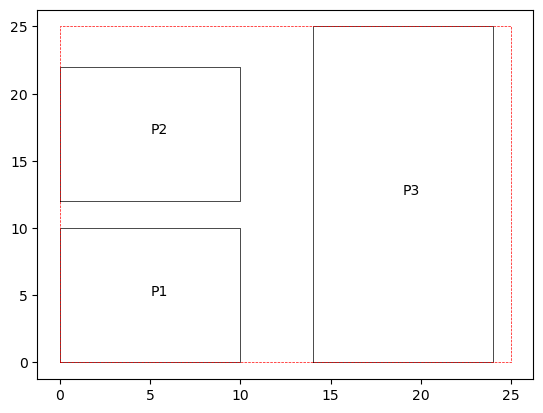

In [681]:
map.add_gdf(place_gdf, label='Place', alpha=0)
map.add_shape(county1)
map.plot()

### <a id='toc1_1_1_'></a>[Places 1 Parcel Data](#toc0_)

In [682]:
p1_1 = mPolygon(origin=(0, 0), size=(2,2))
p1_2 = mPolygon(origin=(0,2), size=(2,2))
p1_3 = mPolygon(origin=(0,4), size=(2,2))
p1_4 = mPolygon(origin=(0,6), size=(2,2))
p1_5 = mPolygon(origin=(0,8), size=(2,2))
p1_6 = mPolygon(origin=(2,0), size=(2,2))
p1_7 = mPolygon(origin=(2,2), size=(2,2))
p1_8 = mPolygon(origin=(2,4), size=(2,2))
p1_9 = mPolygon(origin=(2,6), size=(2,2))
p1_10 = mPolygon(origin=(2,8), size=(2,2))

p1_11 = mPolygon(origin=(6,0), size=(2,2))
p1_12 = mPolygon(origin=(6,2), size=(2,2))
p1_13 = mPolygon(origin=(6,4), size=(2,2))
p1_14 = mPolygon(origin=(6,6), size=(2,2))
p1_15 = mPolygon(origin=(6,8), size=(2,2))
p1_16 = mPolygon(origin=(8,0), size=(2,2))
p1_17 = mPolygon(origin=(8,2), size=(2,2))
p1_18 = mPolygon(origin=(8,4), size=(2,2))
p1_19 = mPolygon(origin=(8,6), size=(2,2))
p1_20 = mPolygon(origin=(8,8), size=(2,2))

p1_parcels = [p1_1, p1_2, p1_3, p1_4, p1_5, p1_6, p1_7, p1_8, p1_9, p1_10, p1_11, p1_12, p1_13, p1_14, p1_15, p1_16, p1_17, p1_18, p1_19, p1_20]

p1_parcel_data = {
    'OWNER': ['D', 'D', 'F', 'E', 'E', 'A', 'D', 'E', 'E', 'E', 'A', 'D', 'D', 'C', 'F', 'B', 'B', 'C', 'F', 'F']
}
p1_parcel_gdf = GeoDataFrame(p1_parcel_data, p1_parcels).build()

# add line to map
#p1_line = mLine(coords=[(5, 0), (5, 10)], color='black')



In [683]:
map.add_gdf(p1_parcel_gdf, label='OWNER', alpha=0.2, color='blue')

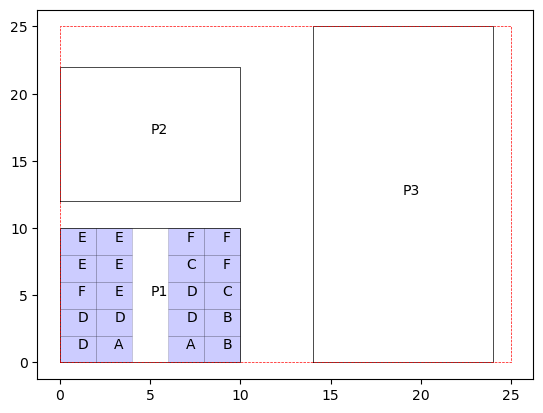

In [684]:
map.plot()

### <a id='toc1_1_2_'></a>[Places 2 Parcel Data](#toc0_)

In [685]:
p2_1 = mPolygon(origin=(0, 12), size=(2,2))
p2_2 = mPolygon(origin=(0,14), size=(2,2))
p2_3 = mPolygon(origin=(0,16), size=(2,2))
p2_4 = mPolygon(origin=(0,18), size=(2,2))
p2_5 = mPolygon(origin=(0,20), size=(2,2))
p2_6 = mPolygon(origin=(2,12), size=(2,2))
p2_7 = mPolygon(origin=(2,14), size=(2,2))
p2_8 = mPolygon(origin=(2,16), size=(2,2))
p2_9 = mPolygon(origin=(2,18), size=(2,2))
p2_10 = mPolygon(origin=(2,20), size=(2,2))

p2_11 = mPolygon(origin=(6,12), size=(2,2))
p2_12 = mPolygon(origin=(6,14), size=(2,2))
p2_13 = mPolygon(origin=(6,16), size=(2,2))
p2_14 = mPolygon(origin=(6,18), size=(2,2))
p2_15 = mPolygon(origin=(6,20), size=(2,2))
p2_16 = mPolygon(origin=(8,12), size=(2,2))
p2_17 = mPolygon(origin=(8,14), size=(2,2))
p2_18 = mPolygon(origin=(8,16), size=(2,2))
p2_19 = mPolygon(origin=(8,18), size=(2,2))
p2_20 = mPolygon(origin=(8,20), size=(2,2))


p2_parcels = [p2_1, p2_2, p2_3, p2_4, p2_5, p2_6, p2_7, p2_8, p2_9, p2_10, p2_11, p2_12, p2_13, p2_14, p2_15, p2_16, p2_17, p2_18, p2_19, p2_20]

p2_parcel_data = {
    'OWNER': ['E', 'C', 'C', 'C', 'E', 'E', 'B', 'F', 'A', 'D', 'F', 'F', 'C', 'C', 'C', 'F', 'G', 'H', 'I', 'J']
}
p2_parcel_gdf = GeoDataFrame(p2_parcel_data, p2_parcels).build()

# add line to map
p2_line = mLine(coords=[(5, 12), (5, 22)], color='black')


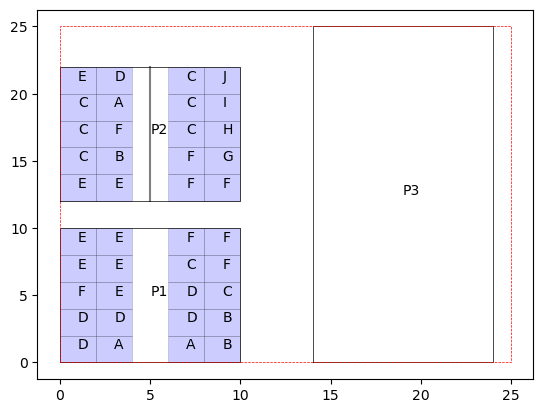

In [686]:
map.add_gdf(p2_parcel_gdf, label='OWNER', alpha=0.2, color='blue')
map.add_shape(p2_line)
map.plot()

### <a id='toc1_1_3_'></a>[Place 3 Parcel Data](#toc0_)

In [687]:
p3_p1 = mPolygon(origin=(14, 0), size=(2,2))
p3_p2 = mPolygon(origin=(14,2), size=(2,2))
p3_p3 = mPolygon(origin=(14,9), size=(2,2))
p3_p4 = mPolygon(origin=(14,11), size=(2,2))
p3_p5 = mPolygon(origin=(14,20), size=(2,2))
p3_p6 = mPolygon(origin=(14,22), size=(2,2))
p3_p7 = mPolygon(origin=(16,0), size=(2,2))
p3_p8 = mPolygon(origin=(16,2), size=(2,2))
p3_p9 = mPolygon(origin=(16,9), size=(2,2))
p3_p10 = mPolygon(origin=(16,11), size=(2,2))
p3_p11 = mPolygon(origin=(16,20), size=(2,2))
p3_p12 = mPolygon(origin=(16,22), size=(2,2))

p3_13 = mPolygon(origin=(20,0), size=(2,2))
p3_14 = mPolygon(origin=(20,2), size=(2,2))
p3_15 = mPolygon(origin=(20,9), size=(2,2))
p3_16 = mPolygon(origin=(20,11), size=(2,2))
p3_17 = mPolygon(origin=(20,20), size=(2,2))
p3_18 = mPolygon(origin=(20,22), size=(2,2))
p3_19 = mPolygon(origin=(22,0), size=(2,2))
p3_20 = mPolygon(origin=(22,2), size=(2,2))
p3_21 = mPolygon(origin=(22,9), size=(2,2))
p3_22 = mPolygon(origin=(22,11), size=(2,2))
p3_23 = mPolygon(origin=(22,20), size=(2,2))
p3_24 = mPolygon(origin=(22,22), size=(2,2))



# add line to map
p3_line = mLine(coords=[(19, 0), (19, 25)], color='black')

p3_parcels = [p3_p1, p3_p2, p3_p3, p3_p4, p3_p5, p3_p6, p3_p7, p3_p8, p3_p9, p3_p10, p3_p11, p3_p12, p3_13, p3_14, p3_15, p3_16, p3_17, p3_18, p3_19, p3_20, p3_21, p3_22, p3_23, p3_24]
p3_parcel_data = {
    'OWNER': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'A', 'B', 'B', 'D', 'D', 'E', 'E', 'F', 'F', 'G', 'D', 'I', 'D', 'F', 'J', 'D', 'G']
}
p3_parcel_gdf = GeoDataFrame(p3_parcel_data, p3_parcels).build()

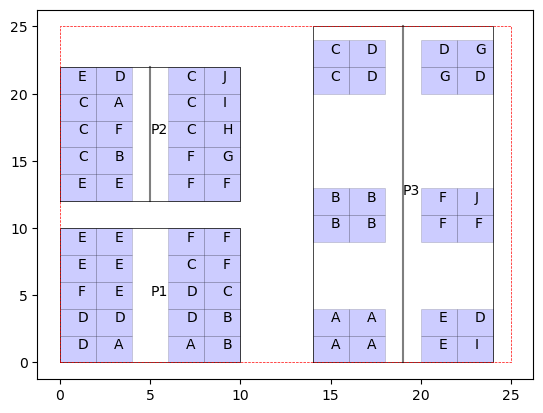

In [688]:
map.add_gdf(p3_parcel_gdf, label='OWNER', alpha=0.2, color='blue')
map.add_shape(p3_line)
map.plot()

In [689]:
parcels = pd.concat([p1_parcel_gdf, p2_parcel_gdf, p3_parcel_gdf], ignore_index=True)

# <a id='toc2_'></a>[II. Clustering](#toc0_)

### <a id='toc2_1_1_'></a>[Clustering Functions](#toc0_)

In [ ]:

""" Functions for KMeans clustering """
def build_place_regions(df, max_parcels_per_cluster):
    """
    Assigns each parcel to a region based on Kmeans clustering.
    Returns a list of region assignments.
    """

    # number of clustrs is proportional to the number of parcels
    nclusters = len(df) // max_parcels_per_cluster
    print(f'Number of clusters: {nclusters}')
    coords = build_coords(df)

    return build_kmeans_clusters(nclusters, coords)

def build_kmeans_clusters(n_clusters, coords):
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_predict(coords)


def build_coords(df):
    return list(zip(df.centroid.x, df.centroid.y))

""" Functions for KNN distance calculation """
def calculate_regional_knn_distance(
            coords, 
            kneighbors, 
            smoothing_window, 
            min_distance, 
            max_distance
        ):
    """
    Calculates the optimal distance for DBSCAN clustering. 
    """
    knn_distances = build_knn_distances(coords, k=kneighbors + 1)
    kth_distances = get_kth_distances(knn_distances)
    smoothed_distances = smooth_distances(kth_distances, window=smoothing_window)
    diff = build_difference(smoothed_distances)
    second_diff = build_difference(diff)
    knn_optimal_distance = calculate_knn_optimal_distance(smoothed_distances, second_diff)

    # optimal distance is between min and max distance
    return min(max(ceil(knn_optimal_distance), min_distance), max_distance)

def build_knn_distances(coords, k):
    """
    Builds a distance matrix between each parcel and its 1 to kth nearest neighbor.
    Returns a 2d array where each row is a parcel and each column 
    is the distance to itself then 1st, 2nd, ..., kth nearest neighbor.
    """
    dtree = cKDTree(coords) # KDTree for nearest neighbor

    # distances between each parcel and its 1 to kth nearest neighbor
    knn_distances, _ = dtree.query(coords, k=k + 1) # +1 to include distance to itself

    return knn_distances



def get_kth_distances(knn_distances):
    """
    Returns the kth nearest neighbor distance for each parcel.
    """
    return np.sort(knn_distances[:, -1])
    
def smooth_distances(distances, window):
    """
    Smooths distances to reduce noise and make the elbow more apparent.
    Window is size of moving average. 
    """
    return uniform_filter1d(distances, size=ceil(window * len(distances)))

def build_difference(distances):
    """
    Builds the difference between each distance and the next.
    """
    return np.diff(distances)


def calculate_knn_optimal_distance(distances, diff_array):
    """
    Finds the elbow point in the difference array.
    returns the index of the elbow point in the difference array. 
    1 is added to the index to get the kth distance.
    Index is then used to get the optimal distance from a sorted array of distances.
    """
    elbow_index = np.argmax(diff_array) + 1
    knn_dist = distances[elbow_index]

    if knn_dist == 0:
        print('Warning: optimal distance is 0. Check input data.')
    if knn_dist < 0:
        print('Warning: optimal distance is negative. Check input data.')
    if knn_dist == np.nan:
        print('Warning: optimal distance is NaN. Check input data.')
    
    return knn_dist

        

""" Functions for DBSCAN clustering """

def polygon_distance(polygon1, polygon2):
    # Calculate the minimum distance between two polygons
    point1, point2 = nearest_points(polygon1, polygon2)
    return point1.distance(point2)

def compute_distance_matrix(polygons):
    # Create a distance matrix between all polygons
    num_polygons = len(polygons)
    distance_matrix = np.zeros((num_polygons, num_polygons))
    
    for i in range(num_polygons):
        for j in range(i + 1, num_polygons):
            distance_matrix[i, j] = polygon_distance(polygons[i], polygons[j])
            distance_matrix[j, i] = distance_matrix[i, j]  # Symmetry
    
    return distance_matrix

def add_attributes(df, **kwargs):
    for key, value in kwargs.items():
        df[key] = value
    return df

def build_owner_clusters(df, min_samples, eps):
    """
    Builds clusters for a same-owner parcels within a region.
    DBSCAN is used to cluster parcels based on their distance
    using the calculated regional optimal distance. 
    """
    polygons = df.geometry.to_list()

    distance_matrix = compute_distance_matrix(polygons)

    if distance_matrix.shape[0] < 3: # only two parcels
        print('Only two parcels in region. No clustering performed.')
        dbscan = np.array([]) # no clustering
        return dbscan
    else:
        return build_dbscan_clusters(distance_matrix, min_samples, eps)

def build_dbscan_clusters(dmatrix, min_samples, eps):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    return dbscan.fit_predict(dmatrix)

def segregate_outliers(value_counts, outlier_value):
    """
    Identifies outliers in a cluster based on the cluster ID.
    Returns a list of outlier cluster Indicies and 
    removes them from the cluster counts.
    """
    
    outliers = value_counts[value_counts.index == outlier_value].index
    outliers = set(list(outliers)) # remove duplicates
    new_counts = counts[counts.index != -1] # drop outliers
    return outliers, new_counts

            
def remove_from_df(df, list_of_ids: List[int], field: str):
    """
    removes rows from a dataframe based on a list of IDs.
    """
    return df[~df[field].isin(list_of_ids)]  

def locate_in_df(df, list_of_ids: List[int], field: str):
    """
    locates rows in a dataframe based on a list of IDs.
    """
    return df[df[field].isin(list_of_ids)]


def generate_cluster_string(List:[str]) -> List[str]:
    """
    Generates and assigns cluster IDs field to df. Returns df with cluster_ID field.
    """
    cluster_string = '-'.join(List)
    return cluster_string

   

In [691]:
sub_parcel_map = Map()

### <a id='toc2_1_2_'></a>[Workflow](#toc0_)

In [ ]:
max_parcels_per_cluster = 10 # maximum number of parcels per Kmeans cluster
kneighbors = 3 # number of nearest neighbors to consider for optimal distance calculation
min_cluster_size = 3 # minimum number of parcels required to form a DBSCAN cluster
max_urban_distance = 5 # max. distance between two likely neighbors
rural_distance = 10 # distance between two parcels in a rural area
smoothing_window = 0.5 # 50% of the distance data is used for smoothing (i.e. 50% of the data is used for the window)
min_urban_distance = 1 # minimum distance between two parcels in an urban area


all_clustered_parcel_data = gpd.GeoDataFrame()
all_single_parcel_data = gpd.GeoDataFrame()
for place_id, place_data in place_gdf.iterrows():
    place_id += 1
    #if place_id == 3:
    #    continue
    print(f"Processing place {place_id}")
    sub_parcels = parcels[parcels.within(place_data['geometry'])]

    regions = build_place_regions(sub_parcels, max_parcels_per_cluster)
    sub_parcels['regions'] = regions
    sub_parcels['regions'] = sub_parcels['regions'].astype(str)

    sub_parcel_map.add_gdf(sub_parcels, label='regions', alpha=0.2, color='blue')
    
    for region in sub_parcels['regions'].unique():
        print('________________________________')
        print(f"Processing region {region}")
        clustered_parcel_data = gpd.GeoDataFrame()
        single_parcel_data = gpd.GeoDataFrame()
        
        regional_parcels = sub_parcels[sub_parcels['regions'] == region]

        region_coords = build_coords(regional_parcels)
        
        regional_singles = []
        if len(regional_parcels) == 1:
            regional_singles.append(regional_parcels)
            continue

        optimal_distance = calculate_regional_knn_distance(
            coords=region_coords,
            kneighbors=kneighbors,
            smoothing_window=smoothing_window,
            min_distance=min_urban_distance,
            max_distance=max_urban_distance
        )
        
        print(f"Optimal distance for Place {place_id}, Region {region}: {optimal_distance}")
        
        unique_owners = regional_parcels['OWNER'].unique()
        for owner in unique_owners:
            print(f"Processing owner {owner}")
            owner_parcels = regional_parcels[regional_parcels['OWNER'] == owner]
                     
            clusters = build_owner_clusters(
                owner_parcels,
                min_samples=min_cluster_size,
                eps=optimal_distance
            )
            
            if len(clusters) == 0: # EMPTY: NO CLUSTERS
                print(f'Owner {owner} has less than 3 parcels')
                single_parcel_data = pd.concat([single_parcel_data, owner_parcels], ignore_index=True)  
                single_parcel_data = add_attributes(
                    single_parcel_data,
                    place_id=place_id,
                    )
                continue

            owner_parcels['cluster'] = clusters # cluster ID
            owner_parcels['area'] = owner_parcels['geometry'].area
            counts = owner_parcels['cluster'].value_counts() # pd.series of cluster counts

            outlier_ids, clean_counts = segregate_outliers(counts, -1)

            add_to_singles = locate_in_df(owner_parcels, outlier_ids, 'cluster')
            add_to_singles = add_to_singles.drop(columns=['cluster', 'area'])
            single_parcel_data = pd.concat([single_parcel_data, add_to_singles], ignore_index=True)

            if len(single_parcel_data) > 0:
                single_parcel_data = add_attributes(
                    single_parcel_data,
                    place_id=place_id,
                )
            
            
            cluster_filter = remove_from_df(owner_parcels, outlier_ids, 'cluster')
            if len(cluster_filter) > 0:
                cluster_filter = add_attributes(
                    cluster_filter,
                    pcount=cluster_filter['cluster'].map(counts),
                    knn_dst=knn_optimal_distance,
                    opt_dst=optimal_distance,
                    place_id=place_id
                )
                clustered_parcel_data = pd.concat([clustered_parcel_data, cluster_filter], ignore_index=True)
           
        # create cluster ID
        if len(clustered_parcel_data) != 0:
            cluster_string = generate_cluster_string([str(place_id), str(region)])
            
            clustered_parcel_data['cluster_ID'] = (
                clustered_parcel_data['OWNER'] + '_' +
                cluster_string + '_' + 
                clustered_parcel_data['cluster'].astype(str)
            )

        if len(single_parcel_data) != 0:
            cluster_string = generate_cluster_string([str(place_id), str(region), 'X'])

            single_parcel_data['cluster_ID'] = (
                single_parcel_data['OWNER'] + '_' +
                cluster_string
            )
        print('________________________________')
                
        all_clustered_parcel_data = pd.concat([all_clustered_parcel_data, clustered_parcel_data], ignore_index=True)
        all_single_parcel_data = pd.concat([all_single_parcel_data, single_parcel_data], ignore_index=True)

Processing place 1
Number of clusters: 2
________________________________
Processing region 0
Optimal distance for Place 1, Region 0: 3
Processing owner D
Processing owner F
Only two parcels in region. No clustering performed.
Owner F has less than 3 parcels
Processing owner E
Processing owner A
Only two parcels in region. No clustering performed.
Owner A has less than 3 parcels
________________________________
________________________________
Processing region 1
Optimal distance for Place 1, Region 1: 3
Processing owner A
Only two parcels in region. No clustering performed.
Owner A has less than 3 parcels
Processing owner D
Only two parcels in region. No clustering performed.
Owner D has less than 3 parcels
Processing owner C
Only two parcels in region. No clustering performed.
Owner C has less than 3 parcels
Processing owner F
Processing owner B
Only two parcels in region. No clustering performed.
Owner B has less than 3 parcels
________________________________
Processing place 2
Num

None

None

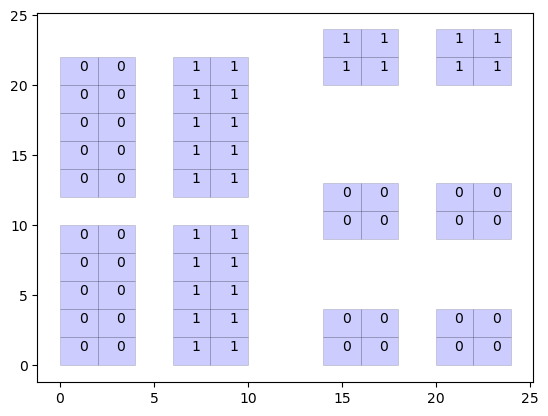

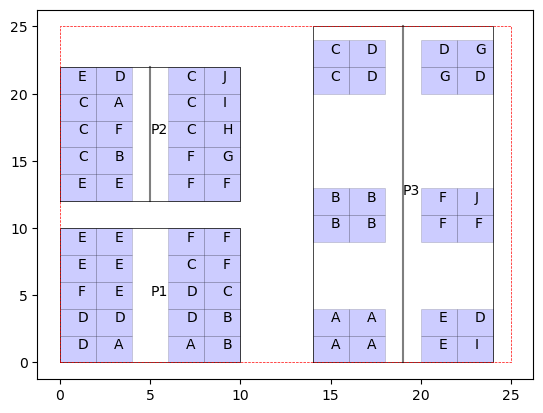

In [693]:
display(sub_parcel_map.plot())
display(map.plot())

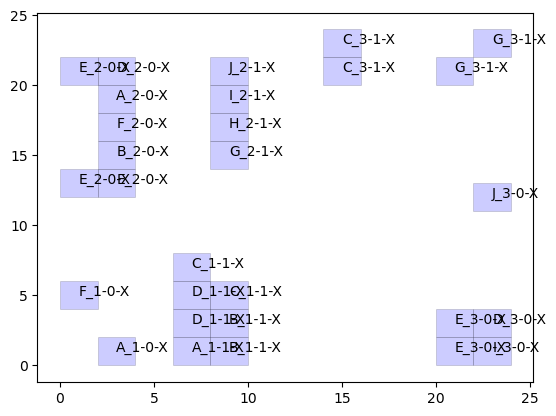

In [694]:
single_parcel_map = Map()
single_parcel_map.add_gdf(all_single_parcel_data, label='cluster_ID', alpha=0.2, color='blue')
single_parcel_map.plot()

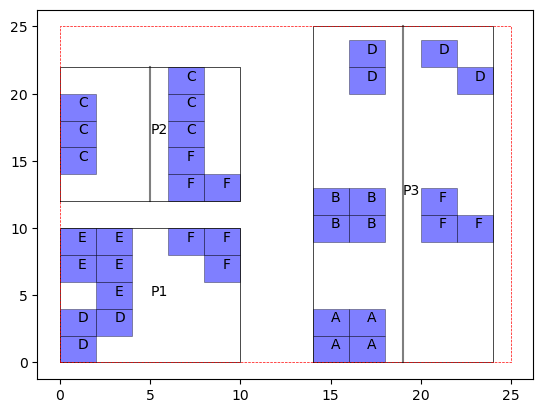

In [695]:
map.remove(p1_parcel_gdf)
map.remove(p2_parcel_gdf)
map.remove(p3_parcel_gdf)
map.add_gdf(all_clustered_parcel_data, label='OWNER')
map.plot()

# <a id='toc3_'></a>[III. First Super Parcel Creation](#toc0_)

In [696]:
parcel_dissolve = all_clustered_parcel_data.dissolve(by='cluster_ID').reset_index()

In [697]:
parcel_dissolve['geometry'] = parcel_dissolve.apply(lambda x: x['geometry'].buffer(x['opt_dst']), axis=1)
parcel_dissolve['geometry'] = parcel_dissolve.apply(lambda x: x['geometry'].buffer(-x['opt_dst']), axis=1)
parcel_dissolve = parcel_dissolve.explode(index_parts=True)


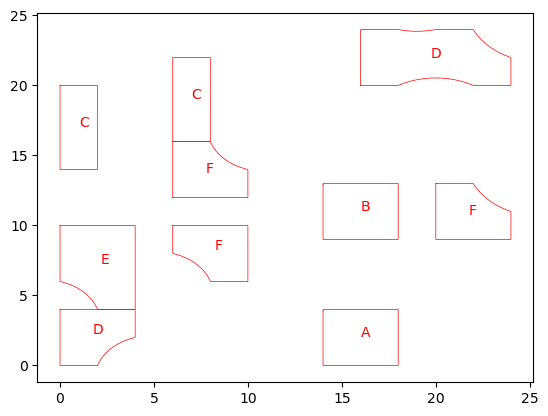

In [698]:
cluster_map = Map()
cluster_map.add_gdf(parcel_dissolve, alpha=0, edgecolor='red', label='OWNER', label_color='red')
cluster_map.plot()

In [699]:
map.add_gdf(parcel_dissolve, alpha=0, edgecolor='red', label='OWNER', label_color='red')

In [700]:
map.add_gdf(all_single_parcel_data, label='OWNER', color='green')

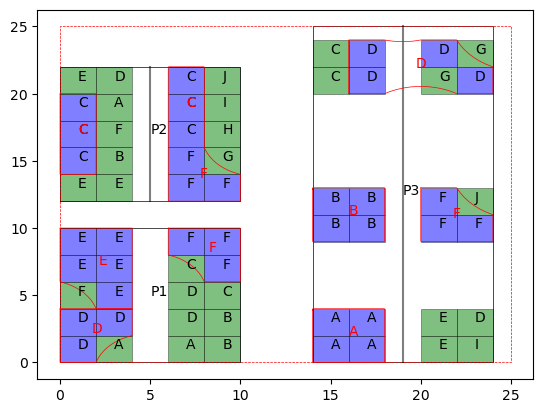

In [701]:
map.plot()

# <a id='toc4_'></a>[IV. Merging](#toc0_)

### <a id='toc4_1_1_'></a>[Single Parcel Merging](#toc0_)

In [703]:
all_clustered_parcel_data = all_clustered_parcel_data.reset_index(drop=False)
all_single_parcel_data = all_single_parcel_data.reset_index(drop=False)

In [704]:
for single_id, single_data in all_single_parcel_data.iterrows():
    
    owner = single_data['OWNER']
   
    
    
    same_owner_n = all_clustered_parcel_data[(all_clustered_parcel_data['OWNER'] == owner)]
    
    if same_owner_n.empty:
        continue
    same_owner_n['cross_dist'] = same_owner_n['geometry'].apply(lambda x: polygon_distance(x, single_data['geometry']))
    same_owner_nclusters = same_owner_n.loc[same_owner_n['cross_dist'] <= 3]
    
    
    if same_owner_nclusters.empty:
        continue
    print('Adding Owner: ', owner)
    same_owner_ncluster = same_owner_nclusters.loc[same_owner_nclusters['cross_dist'].idxmin(), 'cluster_ID']
   
    add_single = all_single_parcel_data[all_single_parcel_data.index == single_id][['OWNER', 'geometry']]
    merge_n = all_clustered_parcel_data[all_clustered_parcel_data['cluster_ID'] == same_owner_ncluster]
    all_clustered_parcel_data = all_clustered_parcel_data[all_clustered_parcel_data['cluster_ID'] != same_owner_ncluster]

    
    same_owner_merge = pd.concat([merge_n, add_single], ignore_index=True)
    new_row_index = same_owner_merge.index[-1]
    source_row_index = same_owner_merge.index[0]
    for col in same_owner_merge.columns:
        if col != 'geometry':  # Skip the geometry field
            same_owner_merge.at[new_row_index, col] = same_owner_merge.at[source_row_index, col]

    all_clustered_parcel_data = pd.concat([all_clustered_parcel_data, same_owner_merge], ignore_index=True)
    

    
    
    
    

Adding Owner:  D
Adding Owner:  D
Adding Owner:  E
Adding Owner:  E
Adding Owner:  F


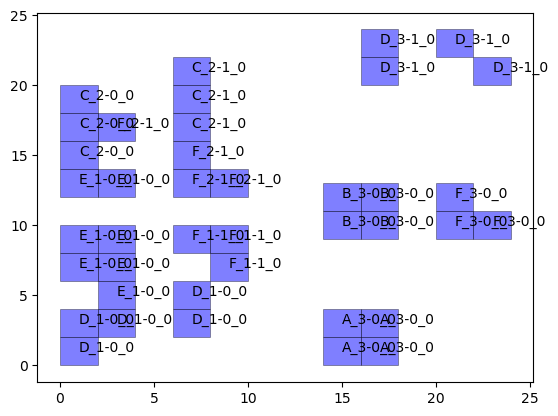

In [705]:
new_map = Map()
new_map.add_gdf(all_clustered_parcel_data, label='cluster_ID', color='blue')
new_map.plot()

### <a id='toc4_1_2_'></a>[Same Owner Cluster Merging](#toc0_)

In [706]:
def merge_cross_region_clusters(df, max_merge_distance=4):
    # Step 1: Identify owners spanning multiple regions
    owner_region_count = df.groupby(['OWNER', 'place_id']).size().unstack(fill_value=0)
    multi_region_owners = owner_region_count[owner_region_count.sum(axis=1) > 1].index

    # Step 2: For each multi-region owner, check distances between clusters
    for owner in multi_region_owners:
        
        owner_df = df[df['OWNER'] == owner]
        
        # Extract centroids for each cluster of the owner
        centroids = owner_df.geometry.centroid
        coords = list(zip(centroids.x, centroids.y))

        # Build a KDTree for fast distance lookup
        tree = cKDTree(coords)

        # Find pairs of clusters within the max_merge_distance
        pairs = tree.query_pairs(max_merge_distance)
        
        # Merge clusters if they are close enough
        for i, j in pairs:
            cluster_i = owner_df.iloc[i]['cluster_ID']
            cluster_j = owner_df.iloc[j]['cluster_ID']

            # Update cluster_ID to merge them
            df.loc[df['cluster_ID'] == cluster_j, 'cluster_ID'] = cluster_i

    return df


# <a id='toc5_'></a>[V. Final Super Parcel Creation](#toc0_)

In [707]:
all_clustered_parcel_data_merged = merge_cross_region_clusters(all_clustered_parcel_data)

In [708]:
parcel_dissolve_merge = all_clustered_parcel_data_merged.dissolve(by='cluster_ID').reset_index()


In [709]:
parcel_dissolve_merge['geometry'] = parcel_dissolve_merge.apply(lambda x: x['geometry'].buffer(x['opt_dst']), axis=1)
parcel_dissolve_merge['geometry'] = parcel_dissolve_merge.apply(lambda x: x['geometry'].buffer(-x['opt_dst']), axis=1)

In [710]:
display(parcel_dissolve_merge.sort_values(by='place_id'))

,cluster_ID,geometry,index,OWNER,regions,cluster,area,pcount,knn_dst,opt_dst,place_id
4,D_1-0_0,"POLYGON ((0.00345 3.99655, 0.07365 4.00000, 3....",0.0,D,0,0.0,4.0,3.0,2.828427,3.0,1.0
6,E_1-0_0,"POLYGON ((0.00594 10.00886, 0.08548 10.27106, ...",3.0,E,0,0.0,4.0,5.0,2.828427,3.0,1.0
7,F_1-1_0,"POLYGON ((2.00345 16.00345, 2.00000 16.07365, ...",8.0,F,1,0.0,4.0,3.0,2.828427,3.0,1.0
2,C_2-0_0,"POLYGON ((0.00345 19.99655, 0.07365 20.00000, ...",11.0,C,0,0.0,4.0,3.0,2.828427,3.0,2.0
3,C_2-1_0,"POLYGON ((6.00345 16.00345, 6.00000 16.07365, ...",17.0,C,1,0.0,4.0,3.0,2.828427,3.0,2.0
0,A_3-0_0,"POLYGON ((14.00000 3.90181, 14.00460 3.99540, ...",20.0,A,0,0.0,4.0,4.0,2.828427,4.0,3.0
1,B_3-0_0,"POLYGON ((14.00000 12.90181, 14.00460 12.99540...",24.0,B,0,0.0,4.0,4.0,2.828427,4.0,3.0
5,D_3-1_0,"POLYGON ((16.00460 20.00460, 16.00000 20.09819...",31.0,D,1,0.0,4.0,4.0,2.828427,4.0,3.0
8,F_3-0_0,"POLYGON ((20.00460 12.99540, 20.09819 13.00000...",28.0,F,0,0.0,4.0,3.0,2.828427,4.0,3.0


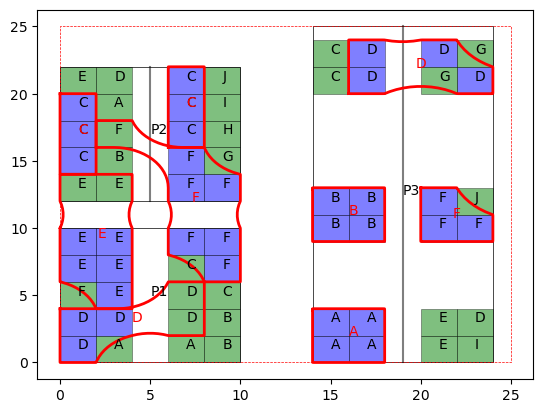

In [711]:
map.remove(parcel_dissolve)
map.add_gdf(parcel_dissolve_merge, alpha=0, edgecolor='red', label='OWNER', label_color='red', linewidth=2)
map.plot()